In [34]:
using PyPlot
include("Epsilometer_read_sd.jl")

converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting data! 
converting

In [35]:
include("local_library.jl")
varnames=["T1","T2","Shear1","Shear2", "Cond1", "Accelx","Accely","Accelz"]

8-element Array{ASCIIString,1}:
 "T1"    
 "T2"    
 "Shear1"
 "Shear2"
 "Cond1" 
 "Accelx"
 "Accely"
 "Accelz"

In [36]:
fid = open("EP_SD_ASCII.TXT")
nblinesavailable = countlines(fid) # countlines changes the position of the file!!!
seekstart(fid)
fLines = readlines(fid) #grab the chunk size or more?

dataBuffer = zeros(UInt32, nblinesavailable, length(varnames));
for (linenum,line) in enumerate(fLines) #over each line
  lineData = split(line[1:end-1],',')
  for(ch, val) in enumerate(lineData)
      dataBuffer[linenum, ch] = parse(UInt32,val,16)
  end
end
Ax     = dataBuffer[:,end-2];
Ay     = dataBuffer[:,end-1];
Az     = dataBuffer[:,end];
Shear1 = dataBuffer[:,3];
Shear2 = dataBuffer[:,4];
T1     = dataBuffer[:,1];
T2     = dataBuffer[:,2];



In [37]:
 #== convert counts to g accelerometers ==#
    VAx = Count2Volt_accel(Ax);
    VAy = Count2Volt_accel(Ay);
    VAz = Count2Volt_accel(Az);
    VShear1=Count2Volt_accel(Shear1);
    VShear2=Count2Volt_accel(Shear2);
    VT1=Count2Volt_accel(T1);
    VT2=Count2Volt_accel(T2);

    #g=4.0283652963203685e6  #in counts check plot_test_flip.ipynb for more detail  
    g=4.0579239359399276e6 # with new set up 
#      gAx = Ax/g;    
#      gAy = Ay/g;   
#      gAz = Az/g;    
      gAx = Volt2g(VAx);    
      gAy = Volt2g(VAy);   
      gAz = Volt2g(VAz);    

    
timeaxis=maketimeaxis(size(dataBuffer,1));


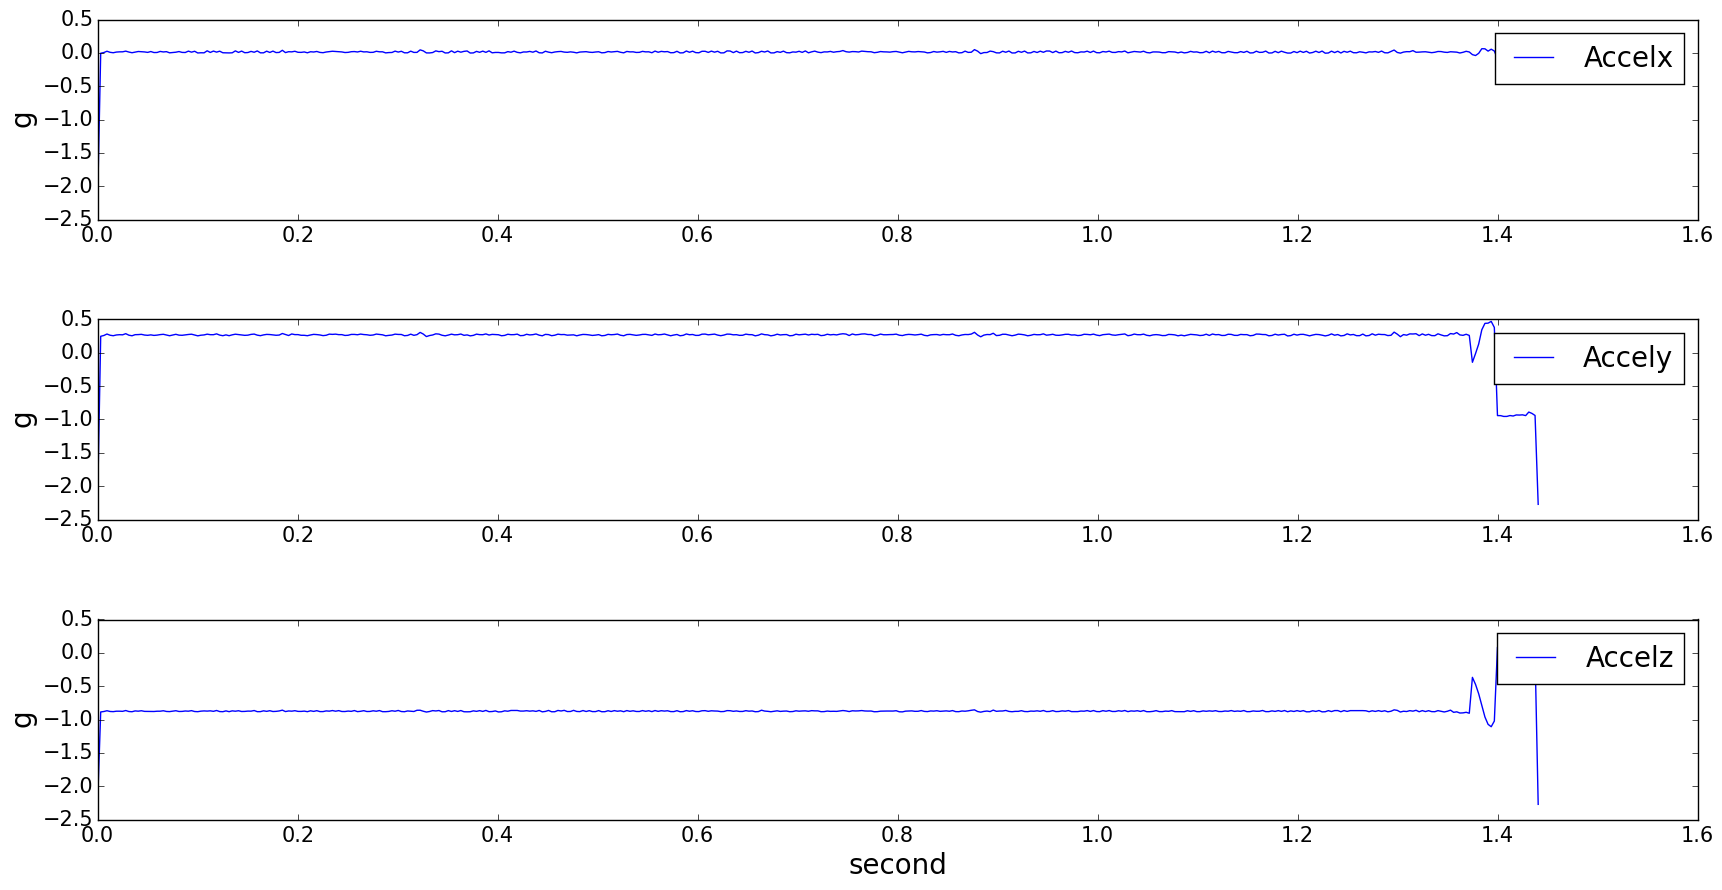

In [38]:
fig1=figure(figsize=(20, 10))
ax1=plt[:axes]([.1,.7,.8,.2])
plt[:xticks](fontsize=15)
plt[:yticks](fontsize=15)
ax2=plt[:axes]([.1,.4,.8,.2])
plt[:xticks](fontsize=15)
plt[:yticks](fontsize=15)
ax3=plt[:axes]([.1,.1,.8,.2])
plt[:xticks](fontsize=15)
plt[:yticks](fontsize=15)
    p1=ax1[:plot](timeaxis,gAx,label=varnames[end-2])
    p2=ax2[:plot](timeaxis,gAy,label=varnames[end-1])
    p3=ax3[:plot](timeaxis,gAz,label=varnames[end])
ax1[:legend](handles=p1,fontsize=20);
ax2[:legend](handles=p2,fontsize=20);
ax3[:legend](handles=p3,fontsize=20);
ax1[:set_ylabel]("g",fontsize=20)
ax2[:set_ylabel]("g",fontsize=20)
ax3[:set_ylabel]("g",fontsize=20)
ax3[:set_xlabel]("second",fontsize=20)

fig1[:savefig]("time_series_accelerometers_from_SD.png")
plt[:draw]()